# Homework #1: Resilience Definitions & Python Introduction

Assignment due February 11, 2026 for AREN 8940: Infrastructure & Community Resilience

In [14]:
import numpy as np
import matplotlib.pyplot as plt

## Part 3: Plotting Q(t)

1. Utilize Python to plot the two resilience pathways according to the definitions shown in the assignment. (Hint: use matplotlib, numpy, and math packages.)

2. Provide your insights and analysis on the plotted resilience paths, compute their resilience index over the time horizon of t = 85 days highlighting any notable differences and their implications for community resilience.

3. Define and explain, in your own words, how each property of resilience (robustness, redundancy, resourcefulness, rapidity) contributes to the overall resilience of the community.

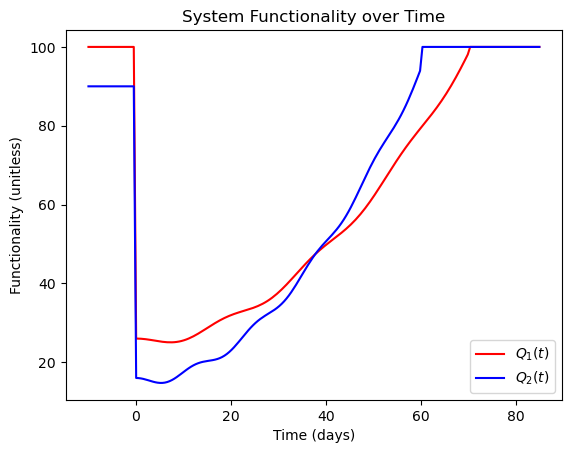

In [21]:
# Assign variables for relevant times.
t_0 = 0
t_r_1 = 70
t_r_2 = 60
x = np.linspace(-10, 85, 190)

# Create functions for both piecewise functions provided.
y_1 = np.piecewise(x,
    [x < t_0, x == t_0, (x > t_0) & (x < t_r_1), x >= t_r_1],
    [lambda x: 100, lambda x: 25, lambda x: 25 + 0.015*(x**2) + np.cos(x/3), lambda x: 100]
)

y_2 = np.piecewise(x,
    [x < t_0, x == t_0, (x > t_0) & (x < t_r_2), x >= t_r_2],
    [lambda x: 90, lambda x: 15, lambda x: 15 + 0.022*(x**2) + np.cos(x/2), lambda x: 100]
)

# Plot functions defined above.
plt.plot(x, y_1, color = 'r', label = '$Q_1(t)$')
plt.plot(x, y_2, color = 'b', label = '$Q_2(t)$')

# Additional plot features.
plt.xlabel("Time (days)")
plt.ylabel("Functionality (unitless)")
plt.title("System Functionality over Time")
plt.legend()

In [33]:
import scipy.integrate as integrate

# Create alternate functions for both given piecewise functions.
def functionality_y_1(x):
    if x < t_0:
        return 100
    elif x == t_0:
        return 25
    elif t_0 < x < t_r_1:
        return 25 + 0.015 * (x**2) + np.cos(x/3)
    else:
        return 100

def functionality_y_2(x):
    if x < t_0:
        return 90
    elif x == t_0:
        return 15
    elif t_0 < x < t_r_2:
        return 15 + 0.022 * (x**2) + np.cos(x/2)
    else:
        return 100

# Calculate the resilience of both equations.
R_1, _ = integrate.quad(functionality_y_1, 0, 85)
R_2, _ = integrate.quad(functionality_y_2, 0, 85)

# Print values for R for both functions.
print("Resilience for Q1:", R_1)
print("Resilience for Q2:", R_2)

# Find normalized values of resilience.
R_n_1 = R_1 / 85
R_n_2 = R_2 / 85

print("Normalized resilience for Q1:", R_n_1, "%")
print("Normalized resilience for Q2:", R_n_2, "%")

Resilience for Q1: 4962.078061809089
Resilience for Q2: 4982.02393738447
Normalized resilience for Q1: 58.377388962459875 %
Normalized resilience for Q2: 58.61204632217023 %


## Part 4: Statistics & Probability Review

Adapting the Jupyter notebooks that are provided on Canvas, perform the following sub-tasks, then attach to the homework all the code and plots that you find appropriate. If you have difficulties, try to use Python's manual, or contact the instructor.

In [64]:
from scipy import stats
from scipy.stats import norm

A. Generate an appropriate number of samples of a random variable with Gaussian distribution (mean 2, standard deviation 3) and call  the resulting vector A.

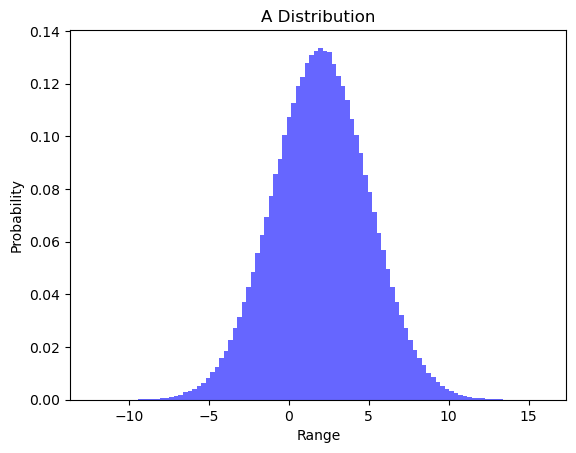

In [76]:
# Define mean and standard deviation.
mu_A = 2
sigma_A = 3

# Create the normal/Gaussian distribution for A.
A = np.random.normal(mu_A, sigma_A, 1000000)

# Plot A to check.
plt.hist(A, bins = 100, density = True, alpha = 0.6, color = 'b')
plt.title('A Distribution')
plt.ylabel('Probability')
plt.xlabel('Range')
plt.show()

B. Generate an appropriate number of samples of a random variable with Gaussian distribution (mean 7, standard deviation 5) and call the resulting vector B.

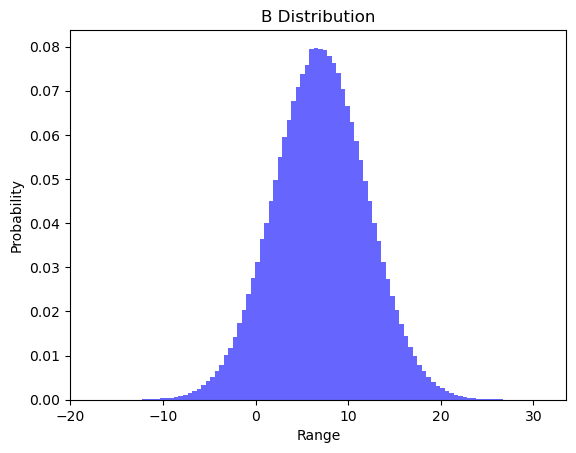

In [77]:
# Define mean and standard deviation.
mu_B = 7
sigma_B = 5

# Create the normal/Gaussian distribution for B.
B = np.random.normal(mu_B, sigma_B, 1000000)

# Plot B to check.
plt.hist(B, bins = 100, density = True, alpha = 0.6, color = 'b')
plt.title('B Distribution')
plt.ylabel('Probability')
plt.xlabel('Range')
plt.show()

C. Use vectors A and B to generate samples of the random variable C = B - A.

In [67]:
# Define C based on the values for B and A.
C = B - A

D. Compute numerically mean and standard deviation of C.

In [68]:
# Calculate mean and standard deviation for C.
mu_C = np.average(C)
std_dev_C = np.std(C)

# Print out calculation results.
print("Mean:", mu_C)
print("Standard Deviation:", std_dev_C)

Mean: 4.969852557937291
Standard Deviation: 5.833587784752096


E. Determine the probability distribution of C using relative frequency histogram, kernel smoothing plot, empirical CDF plot, probability paper plots, and distribution fitting tool.

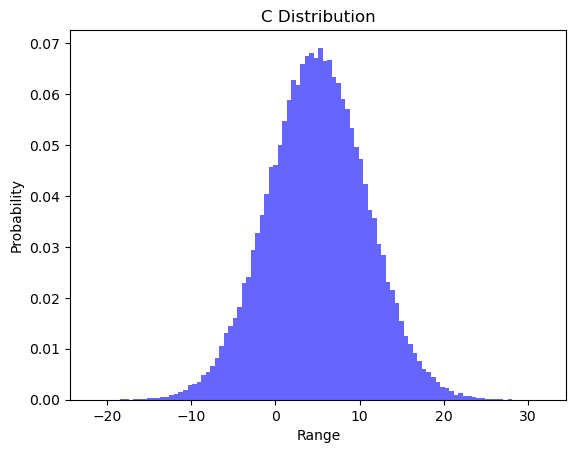

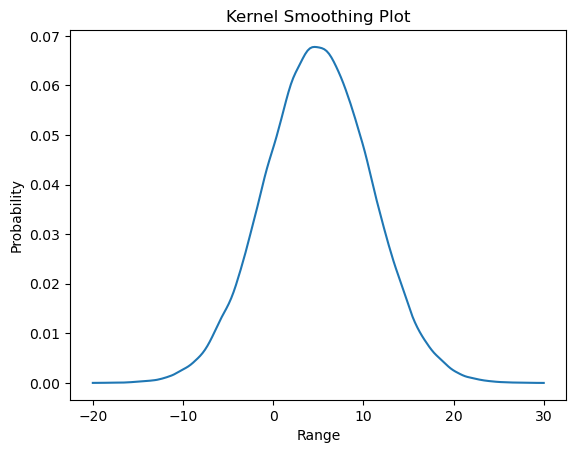

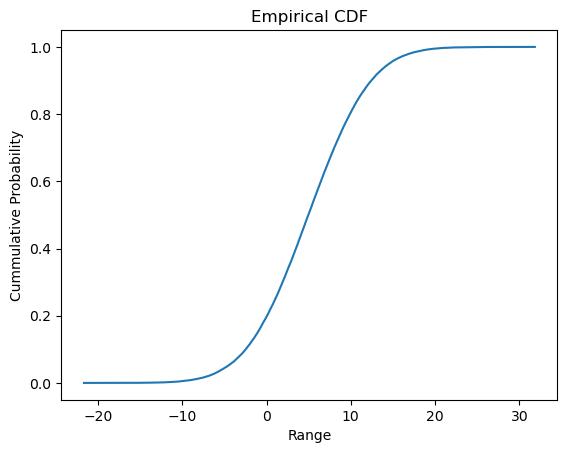

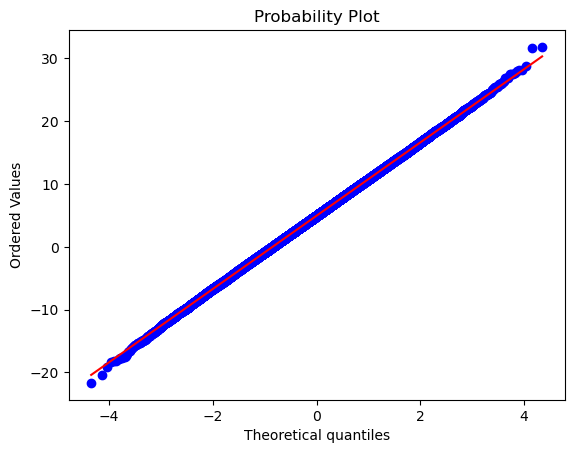

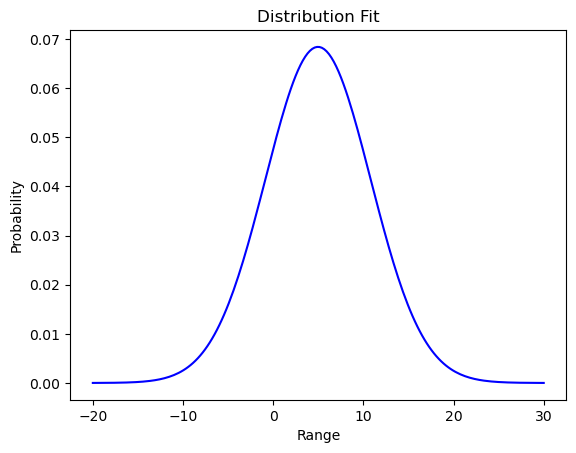

In [79]:
x_C = np.linspace(-20, 30, 190)

# Plot relative frequency histogram.
plt.hist(C, bins = 100, density = True, alpha = 0.6, color = 'b')
plt.title('C Distribution')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.show()

# Create a kernel smoothing plot (i.e., a PDF?).
ksp_C = stats.gaussian_kde(C)
plt.plot(x_C, ksp_C(x_C))
plt.title('Kernel Smoothing Plot')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.show()

# Create an empirical CDF plot.
ecdf_C = stats.ecdf(C)
plt.plot(ecdf_C.cdf.quantiles, ecdf_C.cdf.probabilities)
plt.title('Empirical CDF')
plt.xlabel('Range')
plt.ylabel('Cummulative Probability')
plt.show()

# Create a probability paper plot.
ppp_C = stats.probplot(C, plot = plt)
plt.show()

# Use and plot a distribution fitting tool.
dist_fit_C = norm.pdf(x_C, mu_C, std_dev_C)
plt.plot(x_C, dist_fit_C, 'b')
plt.title('Distribution Fit')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.show()

F. Generate an appropriate number of samples of a random variable with uniform distribution (minimum 2, maximum 5) and call the resulting vector D.

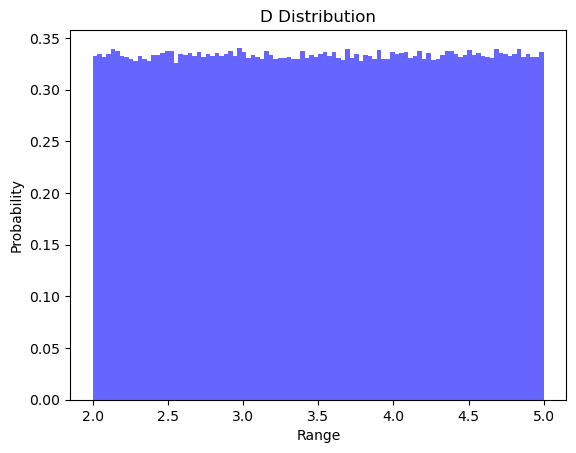

In [80]:
# Define Vector D.
D = np.random.uniform(2, 5, 1000000)

# Graph Vector D to check it worked correctly.
plt.hist(D, bins = 100, density = True, alpha = 0.6, color = 'b')
plt.title('D Distribution')
plt.ylabel('Probability')
plt.xlabel('Range')
plt.show()

G. Use vector D to generate samples of the random variable E = 2D + 3.

In [83]:
# Define Vector E.
E = (2 * D) + 3

H. Compute numerically mean and standard deviation of E.

In [84]:
# Calculate mean and standard deviation for E.
mu_E = np.average(E)
std_dev_E = np.std(E)

# Print out calculation results.
print("Mean:", mu_E)
print("Standard Deviation:", std_dev_E)

Mean: 10.001257565870228
Standard Deviation: 1.7326769740842984


I. Determine the probability distribution of E using relative frequency histogram, kernel smoothing plot, empirical CDF plot, probability paper plots, and distribution fitting tool.

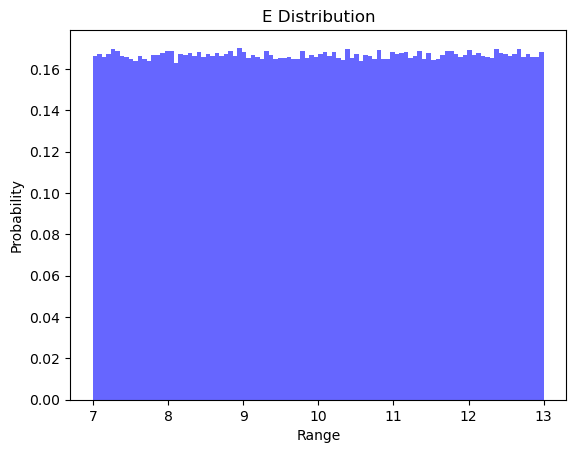

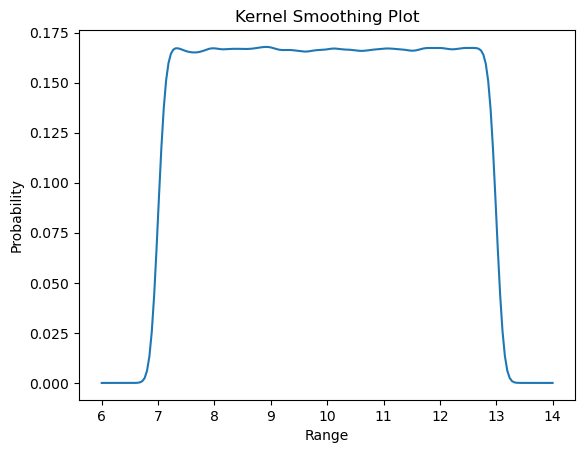

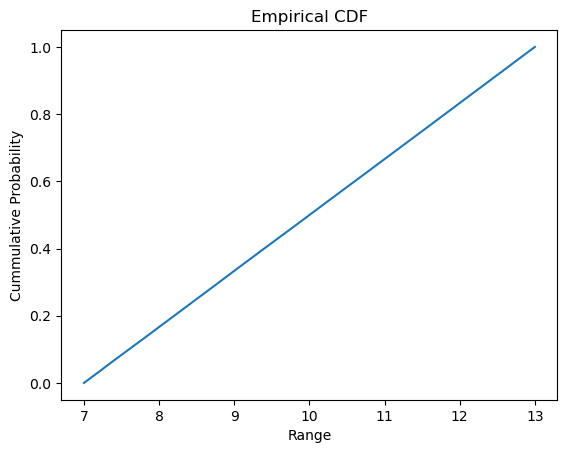

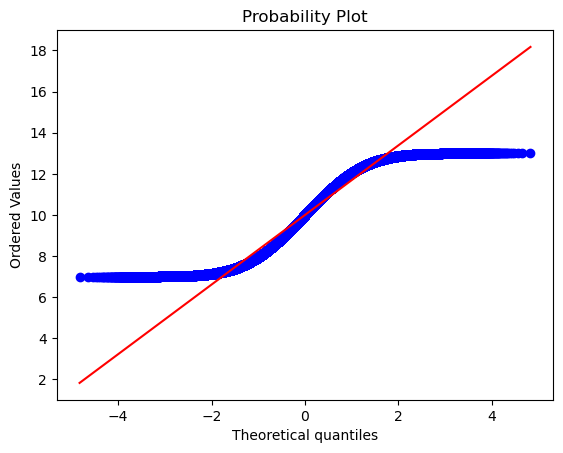

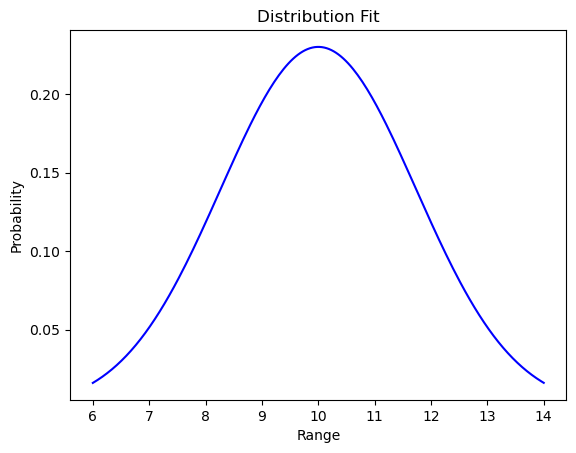

In [87]:
x_E = np.linspace(6, 14, 190)

# Plot relative frequency histogram.
plt.hist(E, bins = 100, density = True, alpha = 0.6, color = 'b')
plt.title('E Distribution')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.show()

# Create a kernel smoothing plot (i.e., a PDF?).
ksp_E = stats.gaussian_kde(E)
plt.plot(x_E, ksp_E(x_E))
plt.title('Kernel Smoothing Plot')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.show()

# Create an empirical CDF plot.
ecdf_E = stats.ecdf(E)
plt.plot(ecdf_E.cdf.quantiles, ecdf_E.cdf.probabilities)
plt.title('Empirical CDF')
plt.xlabel('Range')
plt.ylabel('Cummulative Probability')
plt.show()

# Create a probability paper plot.
ppp_E = stats.probplot(E, plot = plt)
plt.show()

# Use and plot a distribution fitting tool.
dist_fit_E = norm.pdf(x_E, mu_E, std_dev_E)
plt.plot(x_E, dist_fit_E, 'b')
plt.title('Distribution Fit')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.show()

J. Use vectors A and E to generate samples of the random variable F = 3A + E.

In [88]:
# Define Vecotr F.
F = (3 * A) + E

K. Compute numerically mean and standard deviation of F.

In [89]:
# Calculate mean and standard deviation for E.
mu_F = np.average(F)
std_dev_F = np.std(F)

# Print out calculation results.
print("Mean:", mu_F)
print("Standard Deviation:", std_dev_F)

Mean: 15.998392249474342
Standard Deviation: 9.164281004107519


L. Determine the probability distribution of F using relative frequency histogram, kernel smoothing plot, empirical CDF plot, probability paper plots, and distribution fitting tool.

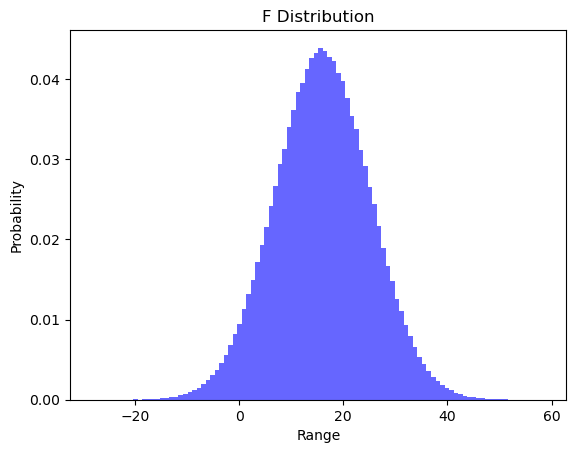

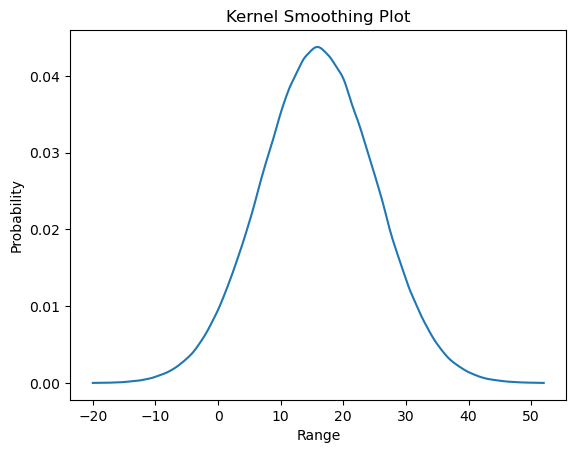

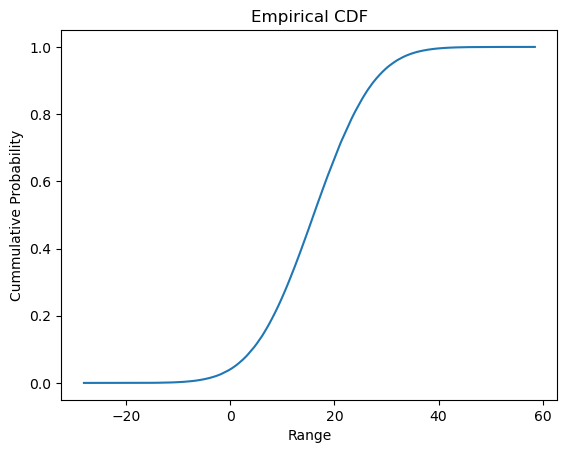

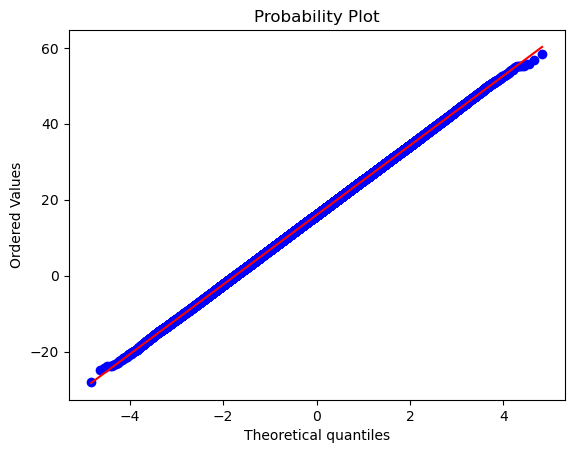

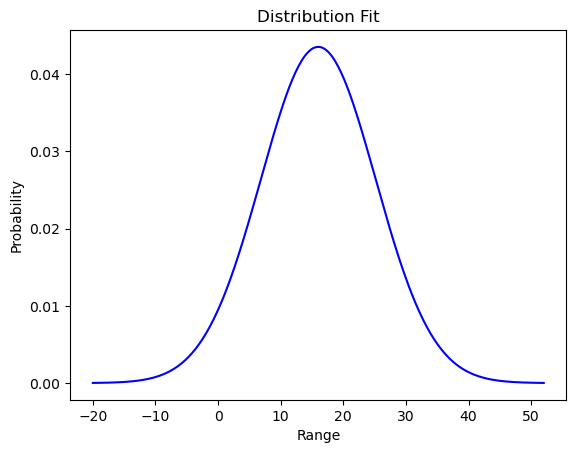

In [90]:
x_F = np.linspace(-20, 52, 288)

# Plot relative frequency histogram.
plt.hist(F, bins = 100, density = True, alpha = 0.6, color = 'b')
plt.title('F Distribution')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.show()

# Create a kernel smoothing plot (i.e., a PDF?).
ksp_F = stats.gaussian_kde(F)
plt.plot(x_F, ksp_F(x_F))
plt.title('Kernel Smoothing Plot')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.show()

# Create an empirical CDF plot.
ecdf_F = stats.ecdf(F)
plt.plot(ecdf_F.cdf.quantiles, ecdf_F.cdf.probabilities)
plt.title('Empirical CDF')
plt.xlabel('Range')
plt.ylabel('Cummulative Probability')
plt.show()

# Create a probability paper plot.
ppp_F = stats.probplot(F, plot = plt)
plt.show()

# Use and plot a distribution fitting tool.
dist_fit_F = norm.pdf(x_F, mu_F, std_dev_F)
plt.plot(x_F, dist_fit_F, 'b')
plt.title('Distribution Fit')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.show()